# 1. Experiment Description

In this experiment, **two ultrasonic transducers** were used for emission and measurement of the acoustic wave in air.

- **Transmitting transducer**: NCG100-D25 by **Ultran**  
  - resonance frequency: **100 kHz**  
  - used to emit a continuous sinusoidal signal at 100 kHz  
  - [Manufacturer’s catalog](http://ultrangroup.com/wp-content/uploads/transducer-catalog.pdf)

- **Receiving transducer**: BAT-1 by **Microacoustic**  
  - used to record the reflected ultrasonic wave  
  - [Manufacturer’s specification](https://microacoustic.com/BAT_species.htm)

---

## Setup and experiment procedure

1. The **Ultran** transducer emits a 100 kHz ultrasonic wave.  
2. The wave is reflected by a **plate** placed opposite to the transmitting transducer.  
3. The reflected signal is recorded by the **Microacoustic** transducer.  
4. The plate was mounted on a **linear motor stage**, allowing its position relative to the transducers to be adjusted.  
5. The input signal was generated using an **arbitrary waveform generator**, and both transmitted and received signals were observed on an **oscilloscope**.  
6. Both the transmitted and received signals were recorded and stored on a computer.
  
The experiment diagram is shown below.  
<img src="image1.png"/>
<img src="image2.png"/>

# 2. Phase Shift Measurement

In the first experiment, a plate was placed at a fixed distance from the transducers.  
The signal corresponding to this position was recorded and stored in file **0.mat**.  
Then, the plate was shifted several times by **0.2 mm**, and for each new position the signal was recorded (files **1.mat, 2.mat, …, 15.mat**).  
- **Channel A**: recorded the reflected wave.  
- **Channel B**: recorded the excitation signal supplied to the transmitting transducer.  

---

## Task 2.1

Using the **analytic signal**, calculate the **phase shift** between:
- signal **A** measured at subsequent positions, and  
- signal **A** measured at the reference position (file *0.mat*).  

It is also possible to calculate the phase shift between signal **A** and signal **B** at each position.  

The phase shift should be computed according to the formula:

$$
\Delta \phi_i = \arg \left( \sum_t \frac{y_{a,i}(t)\,\overline{y_{a,r}(t)}}{|y_{a,r}(t)|^2} \right)
$$

where:
- $y_{a,i}(t)$ – analytic signal of measurement at position *i*,  
- $y_{a,r}(t)$ – analytic signal of the reference signal (position 0),  
- $\overline{y_{a,r}(t)}$ – complex conjugate.  

Plot the obtained phase shifts on a graph.

---

## Task 2.2

Use the calculated **phase shifts** to estimate the **relative displacements** between the plate and the transducers.  
The displacement is computed as:

$$
d = \frac{\Delta \phi \, \lambda}{2 \pi \cdot 2}
$$

where:
- $\Delta \phi$ – phase shift between two points,  
- $\lambda\$ – wavelength of the ultrasonic wave,  
- factor **2** in the denominator accounts for the fact that the wave travels twice the distance (to the plate and back).  

The wavelength in air is given by:

$$
\lambda = \frac{C_p}{f_c}
$$

where:
- \(C_p\) – speed of sound in air,  
- \(f_c\) – carrier frequency.  

### Instructions:
1. Create a plot comparing the estimated displacements with the **true displacements** (multiples of 0.2 mm).  
2. Discuss difficulties caused by **phase wrapping**. How does it limit the measurement range?  
3. Apply `unwrap` to recover a continuous phase and create a new displacement plot.  
4. Adjust the assumed speed of sound \(C_p\) (for ~27 °C, realistic value ~347 m/s) to achieve the best match between estimated and true displacements.

# 3. Instantaneous Phase Measurement for a Moving Plate

In the second experiment, the plate was moved at a constant velocity using a **linear motor**.  
During the motion, the transducers emitted and recorded the same signal as in the first experiment.  
The reflected signal from the moving plate was recorded for different velocities.

---

## Task 3.1

Read the data from file **7mms.mat**, which contains the measurement for the plate moving with a velocity of **7 mm/s**.

1. Compute the **analytic signals** from signals **A** and **B**.  
2. Calculate the **instantaneous phase** using the formula:

$$
\phi(t) = \arg\!\left(\frac{y_a(t)\,\overline{y_b(t)}}{|y_b(t)|^2}\right)
$$

where:
- \(y_a(t)\) – analytic signal of the received (reflected) wave,  
- \(y_b(t)\) – analytic signal of the transmitted (reference) wave.  

---

## Further steps

- Based on the phase plot, estimate the **displacement** of the plate using the same transformation as in Task 2.2:

$$
d(t) = \frac{\phi(t) \, \lambda}{2 \pi \cdot 2}
$$

- Next, estimate the **velocity** of the plate:
  - Fit a **linear function** to \(d(t)\) using `polyfit`.  
  - Compute the velocity from the slope of the fitted line (or equivalently, from the derivative of \(d(t)\)).  

- Compare the **estimated velocity** with the **nominal value** (7 mm/s).  

- Assume the speed of sound in air:

$$
C_p = 331.3 + 0.606 \cdot T
$$

with T 27 C, and calculate the wavelength:

$$
\lambda = \frac{C_p}{f_c}
$$

where \(f_c\) is the carrier frequency (≈ 100 kHz).

---

📌 The goal of this task is to verify whether the phase-based displacement estimation method can correctly reproduce the constant velocity of the moving plate.


## Load Reference Position

In [34]:
import pandas as pd

def load_position_data(idx_position: int):
    path = f'position_data/{idx_position}.csv'
    df = pd.read_csv(path)

    return df

In [35]:
ref_signal = load_position_data(0)
ref_signal

,Tstart,Tinterval,ExtraSamples,RequestedLength,Length,A,B
0,-2.089380e-07,1.600000e-07,0,6250,6250,0.130573,-0.533464
1,-2.089380e-07,1.600000e-07,0,6250,6250,0.108066,0.709861
2,-2.089380e-07,1.600000e-07,0,6250,6250,0.081057,1.420331
3,-2.089380e-07,1.600000e-07,0,6250,6250,0.054048,2.486038
4,-2.089380e-07,1.600000e-07,0,6250,6250,0.027039,3.374737
...,...,...,...,...,...,...,...
6245,-2.089380e-07,1.600000e-07,0,6250,6250,0.234107,-4.975738
6246,-2.089380e-07,1.600000e-07,0,6250,6250,0.216102,-4.087039
6247,-2.089380e-07,1.600000e-07,0,6250,6250,0.198096,-3.376568
6248,-2.089380e-07,1.600000e-07,0,6250,6250,0.180090,-2.310251


## Compute Phase Shift between signal A measured at further points and signal A measured at point 0

In [36]:
from scipy.signal import hilbert
import numpy as np

def phase_shift_between_signal(A_ref: pd.Series, A_shifted: pd.Series, deg=True):
    ya_ref = hilbert(A_ref)          # Reference Analytical Signal
    ya_shifted = hilbert(A_shifted)  # Shifted Analytical Signal
    
    phi_rad = -np.angle(np.sum( (ya_shifted * np.conj(ya_ref)) / (np.abs(ya_ref) ** 2) ))
    
    if deg:
        phi_deg = np.rad2deg(phi_rad)
        return phi_deg

    return phi_rad

In [37]:
points_phase_shifted = []
for i in range(0, 16):
    shifted_signal = load_position_data(i)

    A_ref = ref_signal.A          # Channel A of reference signal
    A_shifted = shifted_signal.A  # Channel A of shifted Signal

    phase_shift = phase_shift_between_signal(A_ref, A_shifted, deg=False)
    points_phase_shifted.append(phase_shift)

points_phase_shifted = np.array(points_phase_shifted)
points_phase_shifted_unwrapped = np.unwrap(points_phase_shifted)

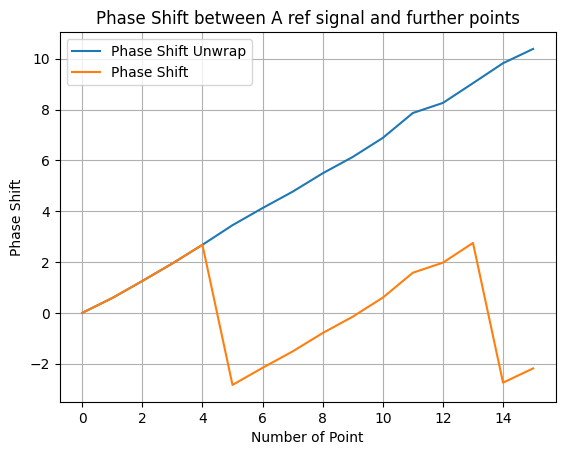

In [38]:
import matplotlib.pyplot as plt

plt.plot(points_phase_shifted_unwrapped, label='Phase Shift Unwrap')
plt.plot(points_phase_shifted, label='Phase Shift')
plt.title('Phase Shift between A ref signal and further points')
plt.ylabel('Phase Shift')
plt.xlabel('Number of Point')
plt.grid(True)
plt.legend()

## Estimate Real Phase Shift

Wykorzystaj przesunięcia fazowe, aby obliczyć relatywne przemieszczenia pomiędzy płytką a
przetwornikami stosując następujący wzór:
d =
Δϕ
2𝜋
𝜆
2
gdzie Δϕ jest przesunięciem fazowym pomiędzy dwoma punktami, a 𝜆 jest długością fali. Długość fali
w powietrzu obliczamy ze wzoru: 𝜆 =
𝐶𝑝
𝑓𝑐
, gdzie 𝐶𝑝 to prędkość fali w powietrzu a 𝑓𝑐
to częstotliwość
fali. Dzielenie przez 2 stosujemy, gdyż mierzona fala musi przebyć drogę pomiędzy nadajnikiem a
odbiornikiem dwa razy.

(temperatura w
pomieszczeniu, w którym wykonywano pomiar wynosiła ok 27 stopni).


### Estimate Frequency of Wave

In [39]:
B_ref = ref_signal.B
fs = 1 / ref_signal.Tinterval.iloc[0]

N = len(B_ref)
df = fs / N
fv = np.arange(N) * df

Y_B_ref = abs(np.fft.fft(B_ref) / N) * 2

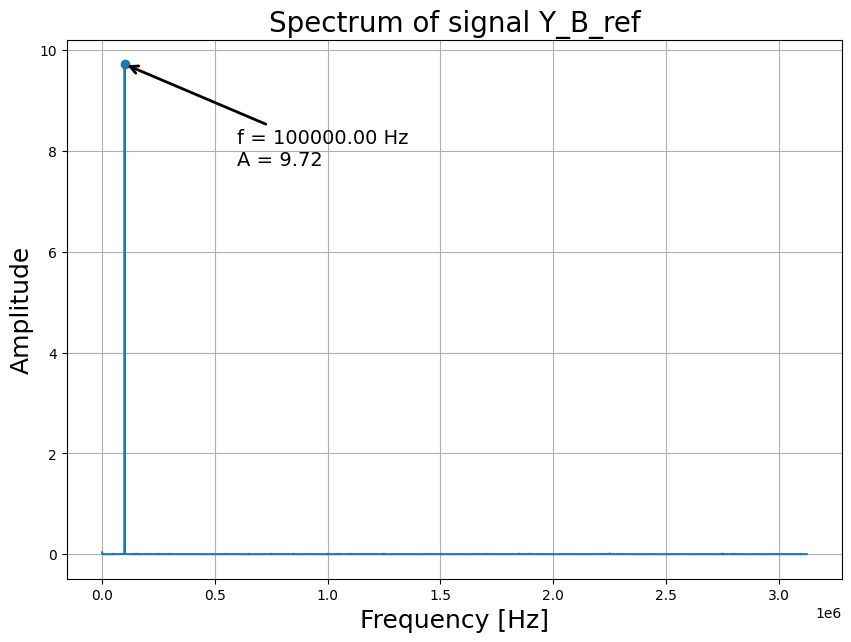

In [40]:
from scipy.signal import find_peaks

f_nyquist = N // 2
peak, _ = find_peaks(Y_B_ref[:f_nyquist], height=0.05)
f_peak = fv[peak[0]]
A_peak = Y_B_ref[peak[0]]

plt.figure(figsize=(10, 7))
plt.plot(fv[:f_nyquist], Y_B_ref[:f_nyquist])
plt.scatter(f_peak, A_peak)
plt.annotate(f"f = {f_peak:.2f} Hz\nA = {A_peak:.2f}",
             xy=(f_peak, A_peak),
             xytext=(f_peak + 500000, A_peak - 2),
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
             fontsize=14,
             ha='left')
plt.title('Spectrum of signal Y_B_ref', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.grid()
plt.show()

### True Shift

In [41]:
import numpy as np
import matplotlib.pyplot as plt


phi = points_phase_shifted_unwrapped.copy()          # [rad], unwrapped
phi -= phi[0]                                        # ref at point 0 -> 0 rad

# True Shift -> 0.2 mm steps
d_true = 0.0002 * np.arange(len(phi))


### Est Cp for temperature 27 C

Initial Cp=347.66 m/s, fc=100000.00 Hz
RMSE0 = 0.078 mm


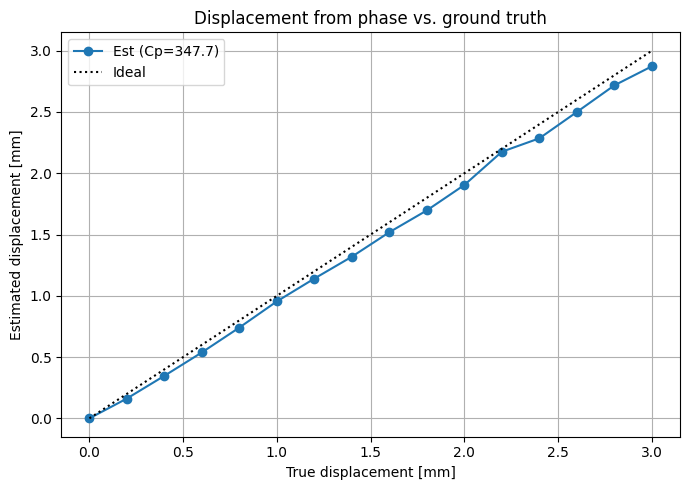

In [42]:
# Cp for temperature 27 C
Cp0 = 331.3 + 0.606*27.0  # [m/s]
fc  = f_peak
lam0 = Cp0 / fc

# estimated displacement for temperature 27 C
d_est0 = lam0 * phi / (2*np.pi*2)

# RMSE
res0  = d_est0 - d_true
rmse0 = np.sqrt(np.mean(res0 ** 2))

print(f"Initial Cp={Cp0:.2f} m/s, fc={fc:.2f} Hz")
print(f"RMSE0 = {1e3*rmse0:.3f} mm")

plt.figure(figsize=(7,5))
plt.plot(1e3*d_true, 1e3*d_est0, 'o-', label=f'Est (Cp={Cp0:.1f})')
plt.plot(1e3*d_true, 1e3*d_true, 'k:', label='Ideal')
plt.xlabel('True displacement [mm]')
plt.ylabel('Estimated displacement [mm]')
plt.title('Displacement from phase vs. ground truth')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Best Cp by least squares (fit d = k * phi, k = Cp/(4πfc))

LS-fitted Cp_best = 362.56 m/s
RMSE_best = 0.028 mm


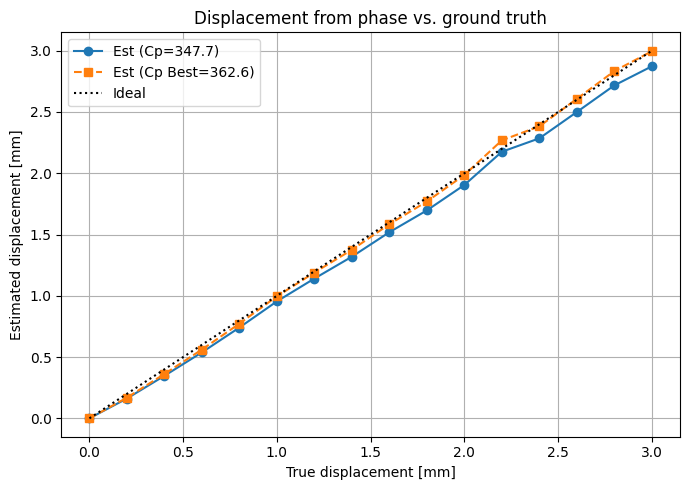

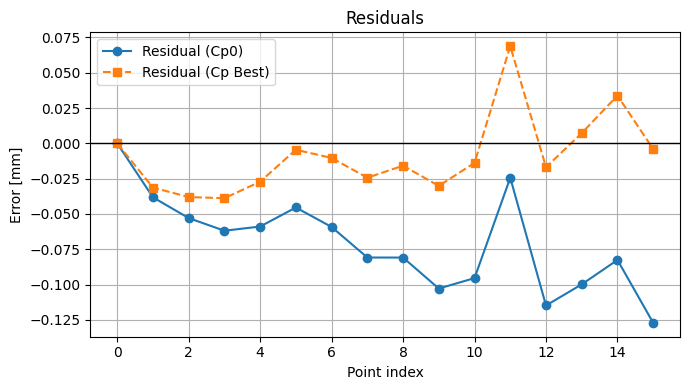

In [43]:
# best Cp by least squares
phi = phi.reshape(-1, 1)

k = np.linalg.inv(phi.T @ phi) @ phi.T @ d_true
Cp_best = 4*np.pi*fc*k[0]

lam_best = Cp_best / fc
d_est_best = lam_best * phi / (2*np.pi*2)
d_est_best = d_est_best.squeeze()

res_best = d_est_best - d_true
rmse_best = np.sqrt(np.mean(res_best ** 2))

print(f"LS-fitted Cp_best = {Cp_best:.2f} m/s")
print(f"RMSE_best = {1e3*rmse_best:.3f} mm")

plt.figure(figsize=(7,5))
plt.plot(1e3*d_true, 1e3*d_est0, 'o-', label=f'Est (Cp={Cp0:.1f})')
plt.plot(1e3*d_true, 1e3*d_est_best, 's--', label=f'Est (Cp Best={Cp_best:.1f})')
plt.plot(1e3*d_true, 1e3*d_true, 'k:', label='Ideal')
plt.xlabel('True displacement [mm]')
plt.ylabel('Estimated displacement [mm]')
plt.title('Displacement from phase vs. ground truth')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(1e3*res0, 'o-', label='Residual (Cp0)')
plt.plot(1e3*res_best, 's--', label='Residual (Cp Best)')
plt.axhline(0, color='k', lw=1)
plt.xlabel('Point index')
plt.ylabel('Error [mm]')
plt.title('Residuals')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Instantaneous phase measurement for a moving plate 

In [44]:
def load_speed_data(speed: int):
    path = f'speed_data/{speed}mms.csv'
    df = pd.read_csv(path)

    return df

In [45]:
speed_7mms = load_speed_data(7)
speed_7mms

,Tstart,Tinterval,ExtraSamples,RequestedLength,Length,A,B
0,-0.000002,1.000000e-06,0,10000000,9967490,0.044496,0.189581
1,-0.000002,1.000000e-06,0,10000000,9967490,-0.100009,0.726646
2,-0.000002,1.000000e-06,0,10000000,9967490,-0.208380,0.985870
3,-0.000002,1.000000e-06,0,10000000,9967490,-0.235481,0.856227
4,-0.000002,1.000000e-06,0,10000000,9967490,-0.181280,0.411817
...,...,...,...,...,...,...,...
9967485,-0.000002,1.000000e-06,0,10000000,9967490,-0.271615,0.541398
9967486,-0.000002,1.000000e-06,0,10000000,9967490,-0.298715,-0.069643
9967487,-0.000002,1.000000e-06,0,10000000,9967490,-0.217414,-0.625202
9967488,-0.000002,1.000000e-06,0,10000000,9967490,-0.045808,-0.958525


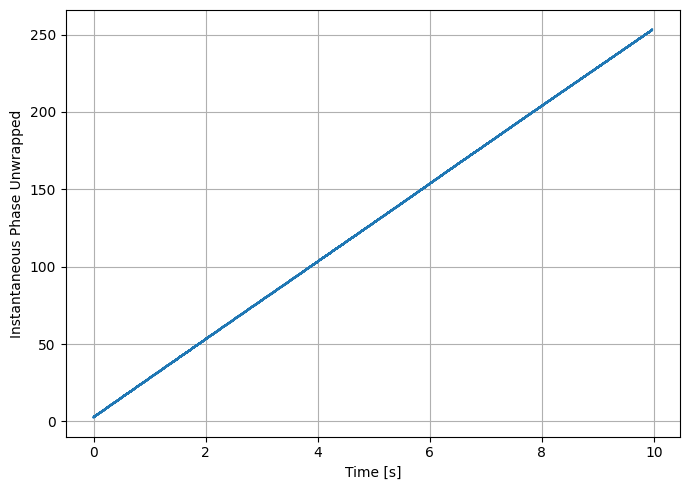

In [48]:
A = speed_7mms.A
B = speed_7mms.B
N = len(A)
T = speed_7mms.Tinterval.iloc[0]
t = np.arange(N) * T

ya_A = hilbert(A)
ya_B = hilbert(B)

instantaneous_phase = np.angle((ya_A * np.conj(ya_B)) / (np.abs(ya_B) ** 2) )
instantaneous_phase_unwrapped = np.unwrap(instantaneous_phase)

plt.figure(figsize=(7,5))
plt.plot(t, instantaneous_phase_unwrapped)
plt.xlabel('Time [s]')
plt.ylabel('Instantaneous Phase Unwrapped')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
Cp = Cp_best
fc = f_peak
lam = lam_best
k = lam_best / (2 * np.pi * 2)

d = k * instantaneous_phase_unwrapped

coef = np.polyfit(t, d, 1)
v_fit, d0 = coef[0], coef[1]            # v_fit w [m/s]

print(f'Velocity: {v_fit} m/s -> {v_fit * 1000} mm/s')

Velocity: 0.0072465292195824 m/s -> 7.2465292195824 mm/s
